In [1]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Using TensorFlow backend.


<b>Model and Layer Setup</b>

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
classifier.add(Flatten())

In [6]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [7]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('./data/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('./data/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 1083 images belonging to 2 classes.
Found 328 images belonging to 2 classes.


<b>Model Fitting and Validation</b>

In [10]:
history = classifier.fit_generator(training_set, steps_per_epoch = 500, epochs = 8,validation_data = test_set, validation_steps = 500)

Epoch 1/8
  5/500 [..............................] - ETA: 5:41 - loss: 2.8580 - acc: 0.5125

C:\Users\cripp\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


500/500 [==============================] - 292s 584ms/step - loss: 0.1580 - acc: 0.9537 - val_loss: 0.2153 - val_acc: 0.9421
Epoch 2/8
500/500 [==============================] - 282s 563ms/step - loss: 0.0437 - acc: 0.9870 - val_loss: 0.2334 - val_acc: 0.9512
Epoch 3/8
500/500 [==============================] - 288s 576ms/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.2759 - val_acc: 0.9421
Epoch 4/8
500/500 [==============================] - 301s 602ms/step - loss: 0.0137 - acc: 0.9953 - val_loss: 0.2925 - val_acc: 0.9543
Epoch 5/8
500/500 [==============================] - 298s 597ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.2921 - val_acc: 0.9482
Epoch 6/8
500/500 [==============================] - 303s 605ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.3143 - val_acc: 0.9482
Epoch 7/8
500/500 [==============================] - 274s 548ms/step - loss: 0.0060 - acc: 0.9978 - val_loss: 0.3185 - val_acc: 0.9512
Epoch 8/8
500/500 [==============================] - 265s 530ms/s

<b>Plotting</b>

In [22]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1,figsize=(8,6))
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2,figsize=(8,6))
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
        plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

<b>Plot training performance</b>

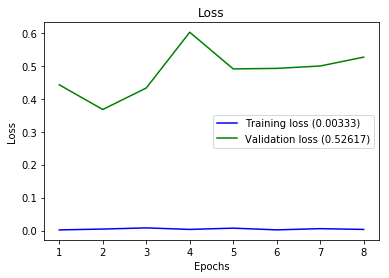

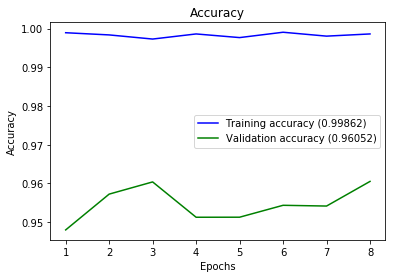

In [27]:
plot_history(history)

<b>Write Out Model</b>

In [ ]:
classifier.save("ada_image_model_3.h5")